In [1]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

# Exercise 5.6

In [2]:
def parallel_euler_maruyama(seed, num_paths, X0, T, N, f, g):
    
    # Set the random seed
    np.random.seed(seed)
    
    # Time increment
    dt = T / N
    
    # Set initial X values
    X = X0
    
    # Times at which to evaluate the integral
    t = np.linspace(0, T, N + 1)
    
    # Wiener process samples
    dW = dt ** 0.5 * np.random.normal(size=(num_paths, N))
    
    for i in range(N):
        
        # Calculate new X according to EM rule
        X[:, i+1] = X[:, i] + f(X[:, i], t[i]) * dt + g(X[:, i], t[i]) * dW[:, i]
        
    W = np.concatenate([np.zeros(shape=(num_paths, 1)), np.cumsum(dW, axis=1)], axis=1)
    
    return t, X, W

def parallel_milstein(seed, num_paths, X0, T, N, f, g):
    
    # Set the random seed
    np.random.seed(seed)
    
    # Time increment
    dt = T / N
    
    # Set initial X values
    X = X0 * np.ones(shape=(num_paths, N + 1))
    
    # Times at which to evaluate the integral
    t = np.linspace(0, T, N + 1)
    
    # Wiener process samples
    dW = dt ** 0.5 * np.random.normal(size=(num_paths, N))
    
    for i in range(N):
        
        # Compute the EM term and the higher order correction term
        dX = f(X[:, i], t[i]) * dt + g(X[:, i], t[i]) * dW[:, i]
        dX = dX + 0.5 * g(X[:, i], t[i]) * g(X[:, i], t[i], grad=True) * (dW[:, i] ** 2 - dt)
        
        X[:, i+1] = X[:, i] + dX
        
    W = np.concatenate([np.zeros(shape=(num_paths, 1)), np.cumsum(dW, axis=1)], axis=1)
    
    return t, X, W

In [3]:
def f_g_gamma(a, b):
    
    def f(X, t):
        return -0.5 * ((1 - a) / X + b) # - X ** (1 - a) * np.exp(b * X) / 100
    
    def g(X, t, grad=False):
        
#         g = X ** ((1 - a) / 2) * np.exp(b * X / 2)
        
#         g_grad = X ** (- (1 + a) / 2) * ((1 - a) / 2) * np.exp(b * X / 2) + b / 2 * X ** ((1 - a) / 2) * np.exp(b * X / 2)
        
#         return g_grad if grad else g

        return 0 if grad else 1
    
    return f, g

def pdf_gamma(x, a, b):
    
    return b ** a / gamma(a) * x ** (a - 1) * np.exp(-b * x)

In [12]:
np.random.seed(0)

a = 3
b = 3

f, g = f_g_gamma(a, b)

# Seed and integration parameters
seed = 0
T = 1e0
N = 10000
num_paths = int(1e4)
X0 = 0.6 * np.random.uniform(size=(num_paths, N + 1)) + 0.4

# Solve approximately via the EM method
t, X, W = parallel_milstein(seed=seed, num_paths=num_paths, X0=X0, T=T, N=N, f=f, g=g)

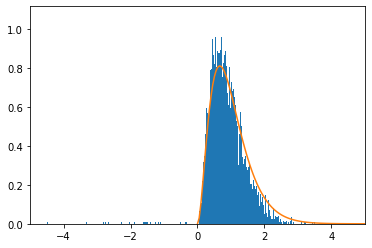

In [13]:
x = np.linspace(0., 5, 100)
pdf = pdf_gamma(x, a, b)

plt.hist(X[:, -1], density=True, bins=1000)
plt.plot(x, pdf)
plt.xlim([-5, 5])
plt.show()